<a href="https://colab.research.google.com/github/0alfajar/MachineLearningProject/blob/main/Stroke_Prediction%5BClass_Imbalance%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data Collection

In [3]:
stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [5]:
# Top 5 data
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# shape data
stroke_data.shape

(5110, 12)

In [9]:
# getting ifo
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [58]:
# corelation between stroke and other column
stroke_data.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245128
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.038947
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
work_type           -0.032316
Name: stroke, dtype: float64

In [11]:
stroke_data.drop('id', axis=1, inplace=True)

In [13]:
stroke_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [41]:
stroke_data.dropna(inplace=True)

In [42]:
# change age type
stroke_data['age'] = stroke_data['age'].astype(int)

In [43]:
# change object to numeric
le = LabelEncoder()
stroke_data['gender'] = le.fit_transform(stroke_data['gender'])
stroke_data['ever_married'] = le.fit_transform(stroke_data['ever_married'])
stroke_data['work_type'] = le.fit_transform(stroke_data['work_type'])
stroke_data['Residence_type'] = le.fit_transform(stroke_data['Residence_type'])
stroke_data['smoking_status'] = le.fit_transform(stroke_data['smoking_status'])

In [44]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


In [45]:
# distribution of stroke
stroke_data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

Separate Feature and Label

In [60]:
X = stroke_data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'stroke'], axis=1)
y = stroke_data['stroke']

Split data into training and Testing data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [63]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())

stroke
0    3901
1     187
Name: count, dtype: int64
stroke
0    3901
1    3901
Name: count, dtype: int64


In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

Data Modelling

In [65]:
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [66]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8776908023483366


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       960
           1       0.20      0.34      0.25        62

    accuracy                           0.88      1022
   macro avg       0.58      0.63      0.59      1022
weighted avg       0.91      0.88      0.89      1022



In [68]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[876  84]
 [ 41  21]]


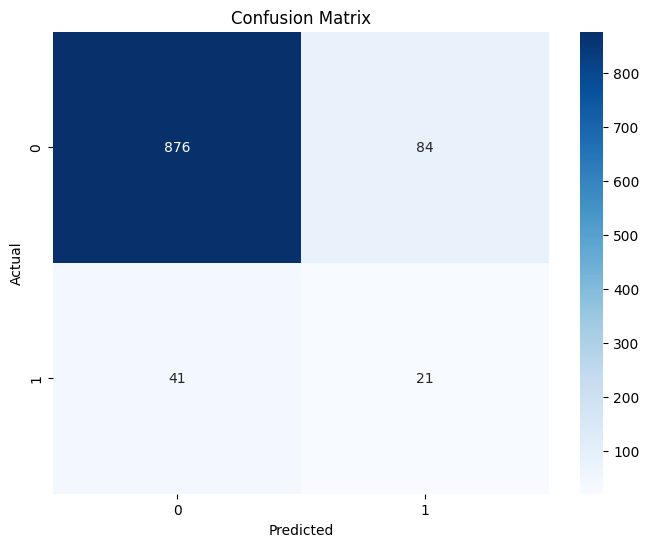

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()